# Southern Women & Events Network Graph

## Description



This is a data set of 18 women observed over a nine-month period. During that period, various subsets of these women met in a series of 14 informal social events. The data recored which women met for which events.

This data is originally from Davis, Gardner and Gardner (1941) via UCINET. This documentation is taken from Freeman (2003) in his usual lucid description. See the reference to the paper below:

In the 1930s, five ethnographers, Allison Davis, Elizabeth Stubbs Davis, Burleigh B. Gardner, Mary R. Gardner and J. G. St. Clair Drake, collected data on stratification in Natchez, Mississippi (Warner, 1988, p. 93). They produced the book cited below (Davis, et al., 1941) that reported a comparative study of social class in black and in white society. One element of this work involved examining the correspondence between people's social class levels and their patterns of informal interaction. Davis et. al was concerned with the issue of how much the informal contacts made by individuals were established solely (or primarily) with others at approximately their own class levels. To address this question the authors collected data on social events and examined people's patterns of informal contacts.

Our data is essentially a 2-mode or bimodal network, meaning it contains two types of nodes. The options that are available to us for analysis are Bipartite network, as well as two separate unipartite networks - for each node type. The primary focus of our analysis below will us a bipartite analysis, that is applied to an adjacency matrix between the two node types - or categorical variables. Essentially the edges in this type of analysis are only between the two node types, and NOT between nodes within the same type. Finally we will apply measures of centrality, redundancy and clustering to make inferences about the relationship between the women and the social events they attend, as well as their relationship to each other.  

In [281]:
import networkx as nx
import networkx.algorithms.bipartite as bipartite
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from scipy import stats
import numpy as np
import math

%matplotlib inline

In [282]:
G = nx.davis_southern_women_graph()
women = G.graph['top']
clubs = G.graph['bottom']
G.nodes()

W = bipartite.projected_graph(G, women)
W.nodes()
W.edges()

[('Theresa Anderson', 'Pearl Oglethorpe'),
 ('Theresa Anderson', 'Flora Price'),
 ('Theresa Anderson', 'Katherina Rogers'),
 ('Theresa Anderson', 'Nora Fayette'),
 ('Theresa Anderson', 'Sylvia Avondale'),
 ('Theresa Anderson', 'Verne Sanderson'),
 ('Theresa Anderson', 'Olivia Carleton'),
 ('Theresa Anderson', 'Brenda Rogers'),
 ('Theresa Anderson', 'Eleanor Nye'),
 ('Theresa Anderson', 'Frances Anderson'),
 ('Theresa Anderson', 'Dorothy Murchison'),
 ('Theresa Anderson', 'Ruth DeSand'),
 ('Theresa Anderson', 'Laura Mandeville'),
 ('Theresa Anderson', 'Evelyn Jefferson'),
 ('Theresa Anderson', 'Charlotte McDowd'),
 ('Theresa Anderson', 'Myra Liddel'),
 ('Theresa Anderson', 'Helen Lloyd'),
 ('Pearl Oglethorpe', 'Helen Lloyd'),
 ('Pearl Oglethorpe', 'Flora Price'),
 ('Pearl Oglethorpe', 'Katherina Rogers'),
 ('Pearl Oglethorpe', 'Nora Fayette'),
 ('Pearl Oglethorpe', 'Sylvia Avondale'),
 ('Pearl Oglethorpe', 'Verne Sanderson'),
 ('Pearl Oglethorpe', 'Olivia Carleton'),
 ('Pearl Oglethorpe

In [283]:
rc = bipartite.node_redundancy(G)
print(bipartite.node_redundancy(G))
print(sum(rc.values()) / len(G))

c = bipartite.clustering(G)
print(bipartite.clustering(G))
print(bipartite.average_clustering(G))

{'Flora Price': 1.0, 'Nora Fayette': 0.75, 'E10': 1.0, 'Verne Sanderson': 1.0, 'E12': 1.0, 'E14': 1.0, 'Frances Anderson': 1.0, 'Dorothy Murchison': 1.0, 'Evelyn Jefferson': 0.9642857142857143, 'Ruth DeSand': 1.0, 'Helen Lloyd': 0.9, 'Olivia Carleton': 1.0, 'Eleanor Nye': 1.0, 'E11': 0.6666666666666666, 'E9': 0.7121212121212122, 'E8': 0.8021978021978022, 'E5': 1.0, 'E4': 1.0, 'E7': 0.9111111111111111, 'E6': 0.9642857142857143, 'E1': 1.0, 'Myra Liddel': 1.0, 'E3': 1.0, 'E2': 1.0, 'Theresa Anderson': 1.0, 'Pearl Oglethorpe': 1.0, 'Katherina Rogers': 1.0, 'Brenda Rogers': 1.0, 'E13': 1.0, 'Charlotte McDowd': 1.0, 'Sylvia Avondale': 1.0, 'Laura Mandeville': 1.0}
0.958458381896
{'Flora Price': 0.2575066137566138, 'Nora Fayette': 0.26057667822373703, 'E10': 0.4033424908424909, 'Verne Sanderson': 0.3488328664799254, 'E12': 0.40144230769230776, 'E14': 0.3664772727272727, 'Frances Anderson': 0.31481721981721983, 'Dorothy Murchison': 0.30500992063492066, 'Evelyn Jefferson': 0.3179433311786252, '

## Redundancy & Clustering


Redundancy coefficient measures how many of a node's neighbors are linked to the other node type in our Bipartite network. The average redundancy for nodes in our graph, is almost a near perfect 1, at .96. This indicates that the women in our data set touch practically all of the events/places. However this doesn't tell us about their colocation.  

The Clustering coefficeint tells us is divided into two types - local and global. In this data set the average clustering coefficient is our global value, and the coefficient for each node is our local value. The average clustering coefficient for our network is .33. This seems to contradict our redundancy coefficient, because it tells a story for very little overlap between the groups of women at the same events. Our high redundancy, and low clustering seems to tell a story of highly-stratified (maybe segregated) society.  

In [284]:
print("Biadjacency matrix")
print(bipartite.biadjacency_matrix(G,women,clubs))

Biadjacency matrix
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 7)	1
  (0, 8)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 4)	1
  (1, 5)	1
  (1, 6)	1
  (1, 7)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	1
  (2, 4)	1
  (2, 5)	1
  (2, 6)	1
  (2, 7)	1
  (2, 8)	1
  (3, 0)	1
  (3, 2)	1
  :	:
  (12, 7)	1
  (12, 8)	1
  (12, 9)	1
  (12, 11)	1
  (12, 12)	1
  (12, 13)	1
  (13, 5)	1
  (13, 6)	1
  (13, 8)	1
  (13, 9)	1
  (13, 10)	1
  (13, 11)	1
  (13, 12)	1
  (13, 13)	1
  (14, 6)	1
  (14, 7)	1
  (14, 9)	1
  (14, 10)	1
  (14, 11)	1
  (15, 7)	1
  (15, 8)	1
  (16, 8)	1
  (16, 10)	1
  (17, 8)	1
  (17, 10)	1



#Friends, Member
17 Evelyn Jefferson
15 Laura Mandeville
17 Theresa Anderson
15 Brenda Rogers
11 Charlotte McDowd
15 Frances Anderson
15 Eleanor Nye
16 Pearl Oglethorpe
17 Ruth DeSand
17 Verne Sanderson
16 Myra Liddel
16 Katherina Rogers
17 Sylvia Avondale
17 Nora Fayette
17 Helen Lloyd
16 Dorothy Murchison
12 Olivia Carleton
12 Flora Price

#Friend meetings, Member
50 Evelyn Jefferson
45 Laura Mandeville
57 Theresa Anderson
46 Brenda Rogers
24 Charlotte McDowd
32 Frances Anderson
36 Eleanor Nye
31 Pearl Oglethorpe
40 Ruth DeSand
38 Verne Sanderson
33 Myra Liddel
37 Katherina Rogers
46 Sylvia Avondale
43 Nora Fayette
34 Helen Lloyd
24 Dorothy Murchison
14 Olivia Carleton
14 Flora Price


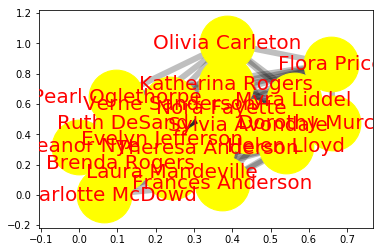

In [285]:
# project bipartite graph onto women nodes
W = bipartite.projected_graph(G, women)
print('')
print("#Friends, Member")
for w in women:
    print('%d %s' % (W.degree(w),w))

# project bipartite graph onto women nodes keeping number of co-occurence
# the degree computed is weighted and counts the total number of shared contacts
W = bipartite.weighted_projected_graph(G, women)
print('')
print("#Friend meetings, Member")
for w in women:
    print('%d %s' % (W.degree(w,weight='weight'),w))
    
pos = nx.spring_layout(W, k=.5,iterations=50)
nx.draw_networkx_labels(W,pos,font_size=20,font_family='sans-serif', font_color = "red")
 
nx.draw_networkx_edges(W,pos,alpha=0.25,width=6)
nx.draw_networkx_nodes(W,pos,node_size=3000, node_color='yellow')

plt.rcParams["figure.figsize"] = [5,5]
plt.show() #add block=True when save as .py

In [286]:
degree_centrality = nx.degree_centrality(W)
for w in sorted(degree_centrality, key=degree_centrality.get, reverse = True):
    print w, degree_centrality[w]
  

Theresa Anderson 1.0
Nora Fayette 1.0
Sylvia Avondale 1.0
Verne Sanderson 1.0
Evelyn Jefferson 1.0
Ruth DeSand 1.0
Helen Lloyd 1.0
Pearl Oglethorpe 0.941176470588
Katherina Rogers 0.941176470588
Dorothy Murchison 0.941176470588
Myra Liddel 0.941176470588
Brenda Rogers 0.882352941176
Eleanor Nye 0.882352941176
Frances Anderson 0.882352941176
Laura Mandeville 0.882352941176
Flora Price 0.705882352941
Olivia Carleton 0.705882352941
Charlotte McDowd 0.647058823529


In [287]:
  

degree = nx.degree(W)
for key, value in sorted(degree.iteritems(), key=lambda (k,v): (v,k), reverse = True):
    print "%s: %s" % (key, value)
    

Verne Sanderson: 17
Theresa Anderson: 17
Sylvia Avondale: 17
Ruth DeSand: 17
Nora Fayette: 17
Helen Lloyd: 17
Evelyn Jefferson: 17
Pearl Oglethorpe: 16
Myra Liddel: 16
Katherina Rogers: 16
Dorothy Murchison: 16
Laura Mandeville: 15
Frances Anderson: 15
Eleanor Nye: 15
Brenda Rogers: 15
Olivia Carleton: 12
Flora Price: 12
Charlotte McDowd: 11


In [288]:
stats.mode(degree.values())[0][0]

17

In [289]:
np.mean(degree.values())

15.444444444444445

In [290]:
np.std(degree.values())

1.8625616238044678

In [291]:
e = bipartite.projected_graph(G, clubs)

degree = nx.degree(e)
for key, value in sorted(degree.iteritems(), key=lambda (k,v): (v,k), reverse = True):
    print "%s: %s" % (key, value)

    
  

E9: 13
E8: 13
E7: 13
E6: 13
E5: 8
E4: 8
E3: 8
E2: 8
E14: 8
E13: 8
E12: 8
E11: 8
E10: 8
E1: 8


In [292]:
stats.mode(degree.values())[0][0]

8

In [293]:
np.mean(degree.values())

9.4285714285714288

In [294]:
np.std(degree.values())

2.2587697572631282

## Centrality

Our measures of centrality above fall in line with graph that we see above, interesting story. The most common or mode number of connection among the women (17) in the graph is also the max, while for events the mode (8) is the min. Which tells us that most of the women have direct connections to each other - save for a few. For the events, it's the reverse...most of the events are not connected to each other. In fact, the events are actually bimodal. There is a stark segregation of events in this graph. We can see from this list the most and least connected women and events. We will look at bipartite ego graphs for the most and least connected womena and events in the next section. 

In [295]:
e9 = nx.ego_graph(G, 'E9', radius=1, center=True, undirected=True, distance=None)
e9.nodes()

['Ruth DeSand',
 'Theresa Anderson',
 'Pearl Oglethorpe',
 'Flora Price',
 'Katherina Rogers',
 'Nora Fayette',
 'Sylvia Avondale',
 'Verne Sanderson',
 'Olivia Carleton',
 'Dorothy Murchison',
 'Evelyn Jefferson',
 'E9',
 'Myra Liddel']

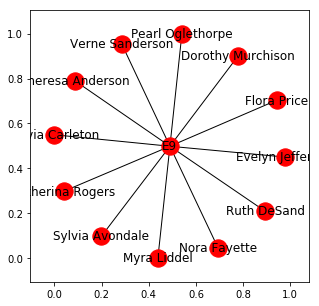

In [296]:
plt.rcParams["figure.figsize"] = [5,5]
nx.draw_networkx(e9, with_labels = "True")

In [297]:
e1 = nx.ego_graph(G, 'E1', radius=1, center=True, undirected=True, distance=None)
e1.nodes()

['Laura Mandeville', 'Evelyn Jefferson', 'E1', 'Brenda Rogers']

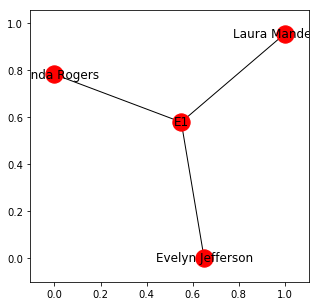

In [298]:
plt.rcParams["figure.figsize"] = [5,5]
nx.draw_networkx(e1, with_labels = "True")


In [299]:
NF = nx.ego_graph(G, 'Nora Fayette', radius=1, center=True, undirected=True, distance=None)
NF.nodes()

['Nora Fayette', 'E10', 'E13', 'E12', 'E14', 'E11', 'E9', 'E7', 'E6']

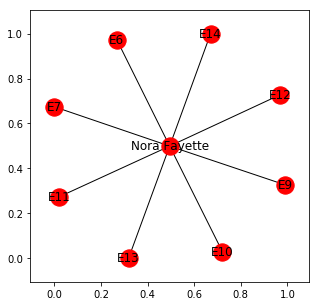

In [300]:
plt.rcParams["figure.figsize"] = [5,5]
nx.draw_networkx(NF, with_labels = "True")

In [301]:
TA = nx.ego_graph(G, 'Theresa Anderson', radius=1, center=True, undirected=True, distance=None)
TA.nodes()

['Theresa Anderson', 'E9', 'E8', 'E5', 'E4', 'E7', 'E6', 'E3', 'E2']

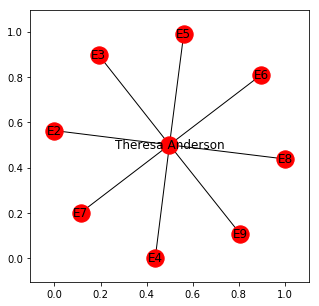

In [302]:
plt.rcParams["figure.figsize"] = [5,5]
nx.draw_networkx(TA, with_labels = "True")

In [303]:
CM = nx.ego_graph(G, 'Charlotte McDowd', radius=1, center=True, undirected=True, distance=None)
CM.nodes()

['E5', 'E4', 'Charlotte McDowd', 'E7', 'E3']

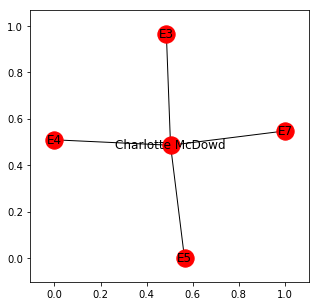

In [304]:
plt.rcParams["figure.figsize"] = [5,5]
nx.draw_networkx(CM, with_labels = "True")

In [305]:
OC = nx.ego_graph(G, 'Olivia Carleton', radius=1, center=True, undirected=True, distance=None)
OC.nodes()

['E11', 'Olivia Carleton', 'E9']

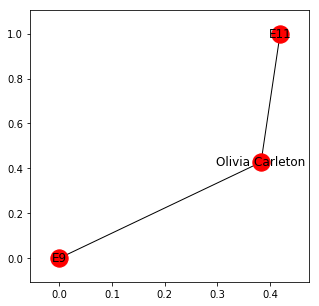

In [306]:
plt.rcParams["figure.figsize"] = [5,5]
nx.draw_networkx(OC, with_labels = "True")

## Insight & Analysis

Event E9 is our event with the highest degree centrality (Three other events also have the same number of connections), and you can can see from the ego graph that the number of connections event9 has to the women node, is almost the same as the direct connections it has to other events (degree centrality). Now, looking at the ego graph for event1(e1),it only has connection to 3 women, and it has 8 connections to other events in it's a unipartite network. Also, none of the women in event were present in event9, pointing to a highly stratified society.  Further the bipartite graphs for the women tell the same story - Nora Fayette and Theresa Anderson have a high degree of centrality in their unipartite networks, and are also at a hight number of events, 8 and 7 respectively. On the other hand, Charlotte McDowd and Olivia Carleton have the lowest number of degree centrality, and 4 and 2 connections in the bipartite graph with events. There's also overlap between the women and events in this case, so Theresa Anderson & Nora Fayette are at events that Charlotte McDowd & Olivia Carleton attend, but they are also at many other events as well. It's likely that the women who have a high degree of centrality to other women, and connectedness to the events nodes are the workers, while the women who have low centrality and connectedness to events are of a priviledged class. 